# Forecasting the No. of Customers in a Restaurant

### Author: Rohan Kulkarni

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
resto=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\RestaurantVisitors.csv',index_col='date',parse_dates=True)

# Parse_date=True is Mandatory.

In [3]:
resto

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [4]:
resto.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [5]:
resto1=resto

##### Nulls are there because, we've given with the dates & holidays to predict that Records. that's why they gave null values purposefully

In [6]:
resto=resto.dropna()

In [7]:
resto.shape

(478, 8)

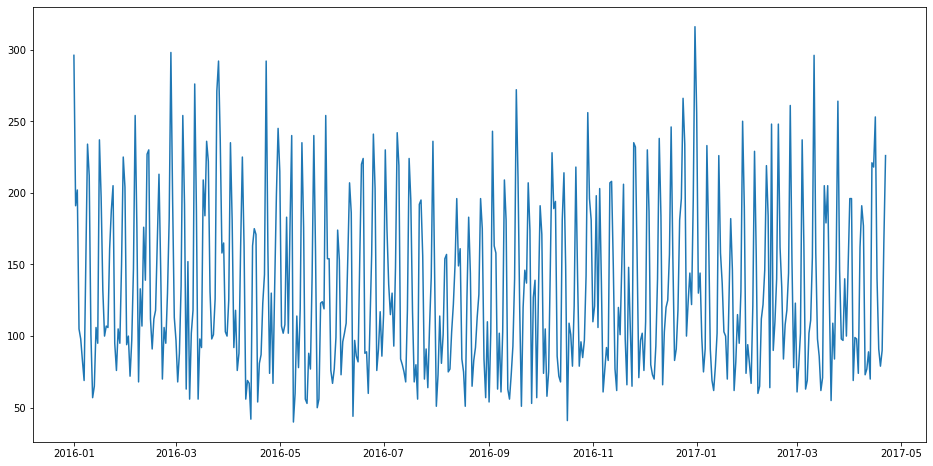

In [8]:
plt.figure(figsize=(16,8))
plt.plot(resto.total)

In [9]:
index_pos=resto[resto['holiday']==1].index
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

 ##### We are fetching date index. to get the index position of the holidays.

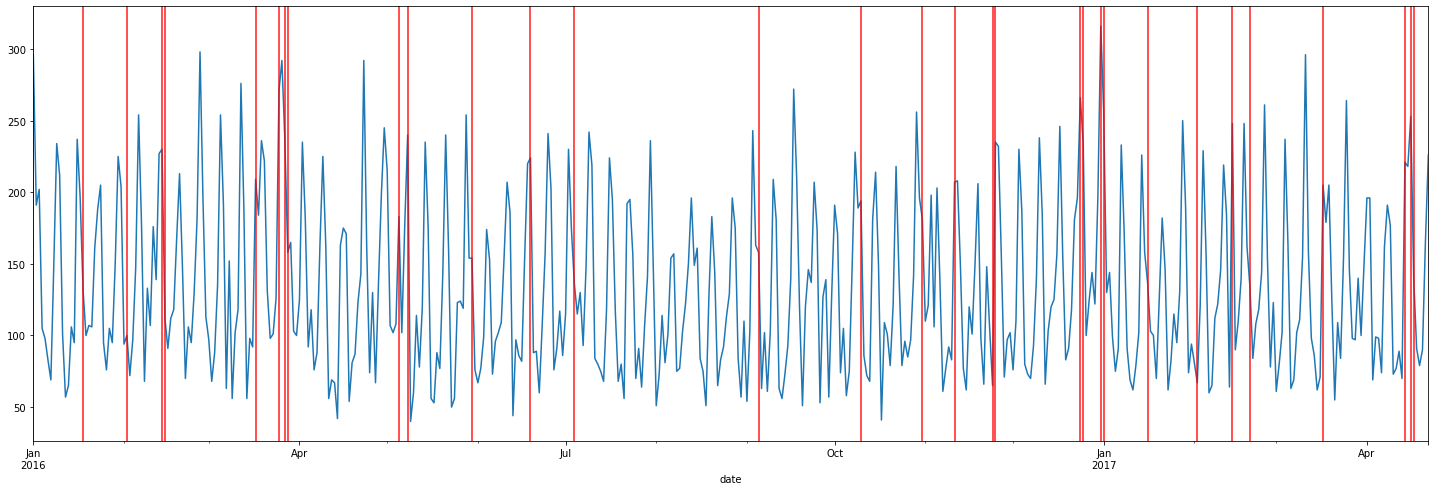

In [10]:
ax=resto['total'].plot(figsize=(25,8))
for day in index_pos :
    ax.axvline(x=day,color='r',alpha=.9) # axvline= For verticle line # alpha= for the shade(dark/fade) of verticle line.

### Importing Seasonal Decompose

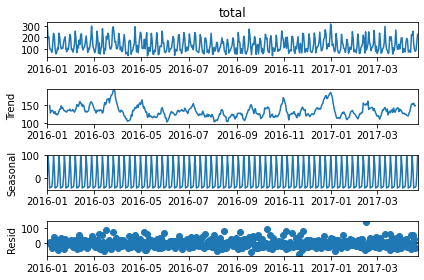

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
resto_seasonal=seasonal_decompose(resto['total'])
resto_seasonal.plot();

##### We are plotting Seasonal decompose to capture is there any Seasonality present or Not.

### Train & test split (sequentially)

In [12]:
train_resto=resto.iloc[0:450]
test_resto=resto.iloc[450:479]

##### Importing Auto-Arima


In [13]:
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
auto_arima(resto['total'],seasonal=True,m=7)

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,1)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\_RoXstaR_\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\_RoXstaR_\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\_RoXstaR_\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\_RoXstaR_\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 654, in fit
    mlefit = super(MLEMode

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [15]:
model_sarima=SARIMAX(train_resto['total'],order=(0, 0, 0),seasonal_order=(1, 0, 1, 7))

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [16]:
result=model_sarima.fit()

In [17]:
pred_resto=result.predict(start=450,end=477)

In [18]:
result.predict(start=450,end=477).shape

(28,)

In [19]:
test_resto.shape

(28, 8)

In [20]:
test_resto[test_resto['holiday']==1].index # Holidays from test data

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

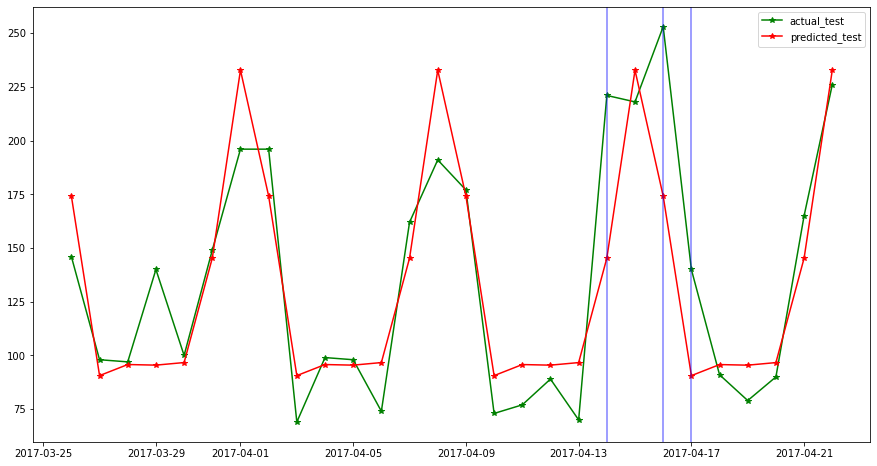

In [21]:
plt.figure(figsize=(15,8))
plt.plot(test_resto.total,marker="*",color='g',label='actual_test')
plt.plot(pred_resto      ,marker="*",color='r',label='predicted_test')
plt.legend()
plt.axvline(x='2017-04-14',color='b',alpha=.5)
plt.axvline(x='2017-04-16',color='b',alpha=.5)
plt.axvline(x='2017-04-17',color='b',alpha=.5)


### from the Graph we can see that, the predicted data is not capturing the trend of the holidays properly. Because, in SARIMAX we didn't provided the value of X yet

In [22]:
err=test_resto.total-pred_resto

In [23]:
MSE=np.mean(np.square(err))
print('MSE:\n',MSE)

MSE:
 875.6071859392435


In [24]:
RMSE=np.sqrt(MSE)
print('RMSE:\n',RMSE)

RMSE:
 29.590660451217435


### Till this point we only used SARIMA.

In [25]:
auto_arima(resto['total'],seasonal=True,m=7,exogenous=resto[['holiday']])

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

### Exogenous must be in data frame format. because it can take more than 1 x values.

In [26]:
model1=SARIMAX(train_resto['total'],order=(1, 0, 0),seasonal_order=(1, 0, 1, 7),exog=train_resto[['holiday']])

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
result1=model1.fit()

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [28]:
pred_test1_exog=result1.predict(start=450,end=477,exog=test_resto[['holiday']])

In [29]:
pred_test1_exog

2017-03-26    176.356296
2017-03-27     81.860447
2017-03-28     93.017053
2017-03-29     95.451375
2017-03-30     92.488011
2017-03-31    138.965227
2017-04-01    228.766748
2017-04-02    169.413085
2017-04-03     80.490877
2017-04-04     92.742983
2017-04-05     95.392950
2017-04-06     92.472238
2017-04-07    138.955123
2017-04-08    228.753085
2017-04-09    169.403186
2017-04-10     80.486196
2017-04-11     92.737605
2017-04-12     95.387421
2017-04-13     92.466878
2017-04-14    207.892994
2017-04-15    228.739827
2017-04-16    238.339293
2017-04-17    149.427457
2017-04-18     92.732230
2017-04-19     95.381892
2017-04-20     92.461519
2017-04-21    138.939016
2017-04-22    228.726569
Freq: D, dtype: float64

In [30]:
err1=test_resto.total-pred_test1_exog

In [31]:
MSE1=np.mean(np.square(err1))
print('MSE:\n',MSE1)

MSE:
 359.20105177545


In [32]:
RMSE=np.sqrt(MSE1)
print('RMSE:\n',RMSE)

RMSE:
 18.95260013231562


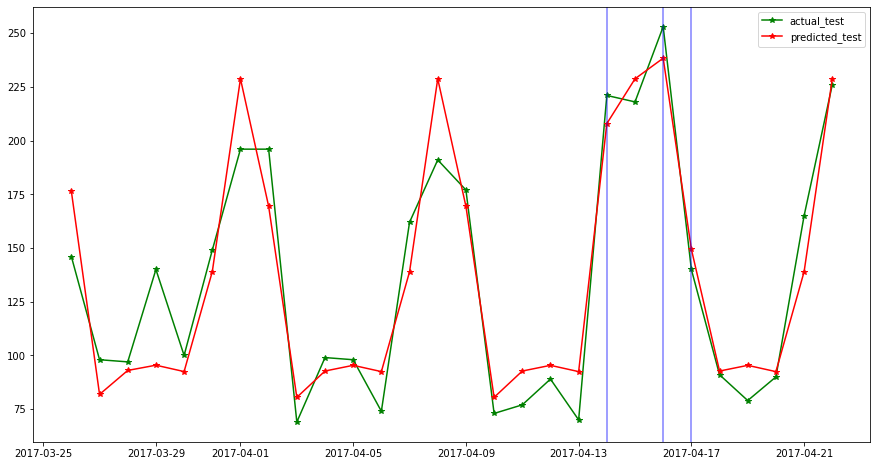

In [33]:
plt.figure(figsize=(15,8))
plt.plot(test_resto.total,marker="*",color='g',label='actual_test')
plt.plot(pred_test1_exog      ,marker="*",color='r',label='predicted_test')
plt.legend()
plt.axvline(x='2017-04-14',color='b',alpha=.5)
plt.axvline(x='2017-04-16',color='b',alpha=.5)
plt.axvline(x='2017-04-17',color='b',alpha=.5)

### As we can see, now we are capturing the Seasonality on holidays using Exogeneous.

# Forecasting last 39 Values

In [34]:
resto1=resto1.iloc[449:517,]

In [35]:
pred_resto1=result1.predict(start=478 ,end=517,exog=resto1[['holiday']])

In [36]:
pred_resto1

2017-04-23    169.383550
2017-04-24     80.476867
2017-04-25     92.726855
2017-04-26     95.376364
2017-04-27     92.456160
2017-04-28    138.930963
2017-04-29    228.713312
2017-04-30    169.373732
2017-05-01     80.472202
2017-05-02     92.721481
2017-05-03     95.370836
2017-05-04     92.450801
2017-05-05    138.922911
2017-05-06    297.645982
2017-05-07    169.363916
2017-05-08     80.467538
2017-05-09     92.716107
2017-05-10     95.365309
2017-05-11     92.445443
2017-05-12    138.914859
2017-05-13    228.686801
2017-05-14    169.354099
2017-05-15    149.408800
2017-05-16     92.710733
2017-05-17     95.359781
2017-05-18     92.440085
2017-05-19    138.906807
2017-05-20    228.673547
2017-05-21    169.344284
2017-05-22     80.458211
2017-05-23     92.705360
2017-05-24     95.354254
2017-05-25     92.434727
2017-05-26    138.898756
2017-05-27    228.660293
2017-05-28    169.334469
2017-05-29     80.453548
2017-05-30    161.645912
2017-05-31     95.348728
2017-06-01     92.429370


## Analyzed a Restaurant dataset of the United States representing no. of Customers coming on weekdays and holidays. 

## Using Time-Series with Auto-ARIMA it was possible to capture the Seasonality of customers.
